In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
fake = pd.read_csv("Fake.csv")

In [5]:
real = pd.read_csv("True.csv")

In [6]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [7]:
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [8]:
# add T/F indicator
real["True"] = 1
fake["True"] = 0

In [9]:
real

,title,text,subject,date,True
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [10]:
news = pd.concat([real, fake])

In [11]:
news.reset_index(inplace=True)

In [12]:
news.drop("index", axis = 1, inplace=True)

In [13]:
news

,title,text,subject,date,True
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## Data Preparation

In [46]:
# drop duplicates
news.drop_duplicates(inplace=True)

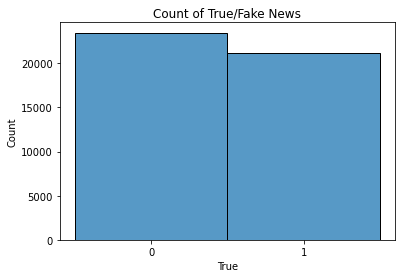

In [54]:
sns.histplot(data=news, x="True", discrete=True)
plt.xticks([0,1])
plt.title("Count of True/Fake News")
plt.show()

In [58]:
# any nan's?
news.isna().sum()

title             0
text              0
subject           0
date              0
True              0
text_processed    0
dtype: int64

In [14]:
def clean_statements(statements):
    """prepares series of text data for sentiment analysis by:
       converting to lowercase, removing punctuation & special characters, 
       removing stop words, and stemming words. Joins tokenized words together 
       at the end for use with Vectorizers"""
    # convert all text to lowercase
    lowercase = statements.str.lower()
    # remove punctuation and special characters
    clean = [re.sub('[^A-Za-z0-9 ]+', '', statement) for statement in lowercase]
    # english stop words
    stop_words = stopwords.words("english")
    # tokenize review into words
    token_clean = [word_tokenize(review) for review in clean]
    # remove stop words
    cleaner = [[word for word in review if word not in stop_words ] for review in token_clean]
    # stem words
    porter = PorterStemmer()
    stemmed = [[porter.stem(word) for word in review] for review in cleaner]
    # join words back together
    cleaned = [" ".join(review) for review in stemmed]
    return cleaned

In [59]:
# create cleaned news text for tfidf
cleaned = clean_statements(news.text)

In [60]:
cleaned

['washington reuter head conserv republican faction us congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint 2018 keep sharp pivot way among republican us repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas nondefens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will say go increas nondefens discretionari spend 7 percent meadow chairman small influenti hous freedom caucu said program democrat say that enough need give govern pay rais 10 11 percent fiscal conserv dont see rational eventu run peopl money said meadow among republican 

In [61]:
# add cleaned into og df
news["text_processed"] = cleaned

In [62]:
news

,title,text,subject,date,True,text_processed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington reuter head conserv republican fact...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington reuter transgend peopl allow first ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington reuter special counsel investig lin...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington reuter trump campaign advis georg p...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,seattlewashington reuter presid donald trump c...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,21st centuri wire say 21wire report earlier we...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,21st centuri wire say familiar theme whenev di...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,patrick henningsen 21st centuri wirerememb oba...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,21st centuri wire say al jazeera america go hi...


#### Split Data

In [63]:
features = news["text_processed"]
target = news["True"]

In [64]:
# split
feat_train, feat_test, target_train, target_test = train_test_split(
    features, target, test_size=.2, random_state=1)

#### Create TF-IDF Features

In [65]:
tfidf = TfidfVectorizer()

In [66]:
# fit transform train
feature_matrix_train = tfidf.fit_transform(feat_train)

In [67]:
# fit don't transform test
feature_matrix_test = tfidf.transform(feat_test)

## Building Model

We're going to build and evaluate two models; random forest and logistic regression.

### Random Forest

In [68]:
rand_forest = RandomForestClassifier(random_state=0, n_jobs=-1)
model_forest = rand_forest.fit(feature_matrix_train, target_train)

In [69]:
pred_forest = model_forest.predict(feature_matrix_test)

#### Evaluation

In [88]:
# conf matrix
conf_mat_forest = confusion_matrix(target_test, pred_forest)
conf_mat_forest

array([[4570,   65],
       [  55, 4248]], dtype=int64)

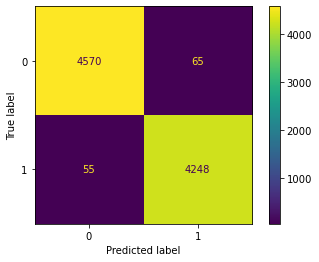

In [89]:
ConfusionMatrixDisplay(conf_mat_forest).plot()
plt.grid(False)
plt.show()

In [71]:
# precision score
precision_forest = precision_score(target_test, pred_forest)
print(f"Precision Score: {precision_forest}")

Precision Score: 0.9849292835613263


In [72]:
# predicted probabilities
target_prob_forest = model_forest.predict_proba(feature_matrix_test)[:, 1]
# true/false pos rates
fp_rate_forest, tp_rate_forest, treshold_forest = roc_curve(target_test, target_prob_forest)

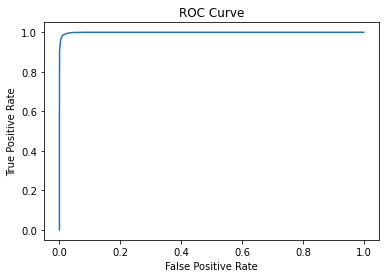

In [73]:
# plotting ROC curve
plt.title("ROC Curve")
plt.plot(fp_rate_forest, tp_rate_forest)
plt.ylabel("True Positive Rate"), plt.xlabel("False Positive Rate")
plt.show()

That is almost perfect to a worrying agree!

### Logistic Regression

In [74]:
log = LogisticRegression(random_state=0, n_jobs=-1)
model_log = log.fit(feature_matrix_train, target_train)

In [75]:
pred_log = model_log.predict(feature_matrix_test)

#### Evaluation

In [86]:
# conf matrix
conf_mat_log = confusion_matrix(target_test, pred_log)
conf_mat_log

array([[4568,   67],
       [  53, 4250]], dtype=int64)

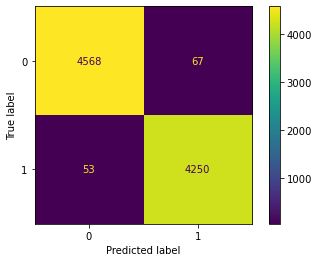

In [87]:
ConfusionMatrixDisplay(conf_mat_log).plot()
plt.grid(False)
plt.show()

In [77]:
# precision score
precision_log = precision_score(target_test, pred_log)
print(f"Precision Score: {precision_log}")

Precision Score: 0.984479962937225


In [78]:
# predicted probabilities
target_prob_log = model_log.predict_proba(feature_matrix_test)[:, 1]
# true/false pos rates
fp_rate_log, tp_rate_log, treshold_log = roc_curve(target_test, target_prob_log)

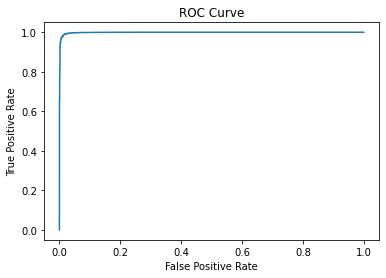

In [79]:
# plotting ROC curve
plt.title("ROC Curve")
plt.plot(fp_rate_log, tp_rate_log)
plt.ylabel("True Positive Rate"), plt.xlabel("False Positive Rate")
plt.show()

Still very good. Random Forest did better so let's stick with that. Gonna try a cross val test to see if that changes anything

### Cross Validation

In [80]:
rand_for = RandomForestClassifier()

In [81]:
scores = cross_val_score(rand_for, feature_matrix_train, target_train, cv=5)

In [90]:
scores.mean()

0.9859303750367937

### Notes

- For white paper, spend a good chunk of time discussing the assumptions we have to make about the data (ie that it was categorized correctly, what the justification for marking something true/false even is, etc) and how that makes it difficult to evaluate the model